/home/romuald/ENSEIGNEMENT/1-JupyterNotebooks/pyPhysChem/ImageProcessing



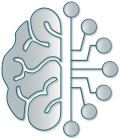

**Start at:** Thursday 02 October 2025, 22:19:32  
**Hostname:** device-8.home (Linux)

<p style="text-align: center"><img width="800px" src="../config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

print(os.getcwd())
cwd0 = '../config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import fg,bg,hl,color
vID.init(cwd0)

import tools4pyPhysChem as t4pPC

#cancel the "last show-up" behaviour of Jupyter notebooks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

__author__ = "Simon Cayez, LPCNO / Département Génie Physique (INSA Toulouse, France)"

<h2 style="text-align: center;">
  <b><u>Introduction to Image Processing in Python</u>:<br></b>
</h2>

## 1- Numpy Library basics

<div class="intro">

NumPy is a library designed for manipulating **multidimensional arrays**.  
It is an essential tool for data science and research. NumPy enables you to perform complex mathematical operations, data manipulations, and logical operations efficiently and with a clear syntax.  
It forms the foundation of many other scientific Python libraries.  
Because NumPy is **written in C**, it can handle **complex operations** on **large amounts of data** much faster than pure Python code.
</div>

### 1-1-  Dimension and shape

#### 1-1-1- Read dimension and shape

<div class="intro">

- **shape** returns a tuple indicating the size of the array along each dimension.  
- **ndim** returns the number of dimensions of the array.

</div>

In [ ]:
import numpy as np

# --- 1D array ---
array_1d = np.array([1, 2, 3])
print("1D array:\n", array_1d)
print(f"  ndim  : {array_1d.ndim} (number of dimensions)")
print(f"  shape : {array_1d.shape} (size along each dimension)")
print("-" * 40)

# --- 2D array ---
array_2d = np.array([[1, 2, 3],
                     [4, 5, 6]])
print("2D array:\n", array_2d)
print(f"  ndim  : {array_2d.ndim}")
print(f"  shape : {array_2d.shape}")
print("-" * 40)

# --- 3D array ---
array_3d = np.array([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]]
])
print("3D array:\n", array_3d)
print(f"  ndim  : {array_3d.ndim}")
print(f"  shape : {array_3d.shape}")

#### 1-1-2- Change dimension and shape

<div class="intro">

**Reshape**. If you need to change the shape of an array without altering its data, for example to use tools that expect NumPy arrays with specific dimensions as input.
`np.reshape` will create a new array with the specified shape.
</div>

In [ ]:
array_1 = np.array([1, 2, 3, 4, 5, 6])
array_2 = np.reshape(array_1, (2, 3))  # Request to reshape into 2 rows and 3 columns

print('Before:')
print(array_1)
print('Shape =', array_1.shape)
print('Number of dimensions =', array_1.ndim)
print('------------------')
print('After:')
print(array_2)
print('Shape =', array_2.shape)
print('Number of dimensions =', array_2.ndim)


<div class="intro">
    
**Flatten Array**. `my_array.flatten`  transforms a multi-dimensional into a single dimension array
</div>

In [ ]:
# 3D array (2 blocs de 2×3)
my_array = np.array([
    [[1, 2, 3],
     [4, 5, 6]],
    [[7, 8, 9],
     [10, 11, 12]]
])

print('----- my_array -----')
print(my_array)
print('Shape of my_array:', my_array.shape)

# Flatten (convertir en tableau 1D)
my_flatten_array = my_array.flatten()

print('----- my_array (flattened) -----')
print(my_flatten_array)
print('Shape of flattened array:', my_flatten_array.shape)


<div class="intro">
    
**Squeeze a dimension**. It often happens that one of the array’s dimensions is equal to 1 without it being necessary; to remove this or these dimensions, we can use `np.squeeze`.
</div>

In [ ]:
# Create a 3D array with an unnecessary dimension of size 1
my_array = np.array([[[1], [2], [3]]])

print("Original array:")
print(my_array)
print("Shape of the array:", my_array.shape)   # (3,1,?) depending on how you build it
print("Number of dimensions:", my_array.ndim)
print('---------------')

# Automatically remove all dimensions of size 1
squeezed_array = np.squeeze(my_array)

print("Array after np.squeeze:")
print(squeezed_array)
print("Shape of the array:", squeezed_array.shape)  # Reduced dimensions
print("Number of dimensions:", squeezed_array.ndim)



<div class="intro">

`np.squeeze()` removes all axes (dimensions) of size **1** from a NumPy array.  
This is useful when an array has redundant singleton dimensions and you want a simpler shape without altering the data itself.

</div>

### 1-2- Statistics on an array

<div class="intro">
    
NumPy allows you to perform various **statistical operations** on arrays, such as finding the **minimum**, **maximum**, or **mean** values. These operations can be applied to the whole array or along a specific axis.

By specifying the `axis` argument, you can choose the dimension along which the operation is performed:

- `axis=0` → operate **along columns** (down the rows)  
- `axis=1` → operate **along rows** (across columns)
</div>

In [ ]:
# Create a 2D array
arr = np.array([[1, 5, 3],
                [4, 2, 6]])

print("Original array:")
print(arr)

# Maximum of the entire array
print("Max of the whole array:", np.max(arr))

# Maximum of each column
print("Max of each column:", np.max(arr, axis=0))

# Maximum of each row
print("Max of each row:", np.max(arr, axis=1))

### 1-4- Select Parts of arrays

#### 1-3-1- Slice Notation

<div class="intro">
    
In NumPy, you can extract specific elements, rows, columns, or entire sub-arrays using **slicing**
</div>

In [ ]:
# Define a simple 1D array with 8 elements
my_array = np.array([10, 20, 30, 40, 50, 60, 70, 80])

print("Original 1D array (shape: {}):\n".format(my_array.shape), my_array)

# Access a single element
print("\nmy_array[3] -> element at index 3:")
print(my_array[3])  # 40

# Slice from index 2 to 5 (include 2, exclude 5)
print("\nmy_array[2:5] -> elements from index 2 up to (but not including) 5:")
print(my_array[2:5])  # [30 40 50]

# Slice from start up to index 4
print("\nmy_array[:4] -> first 4 elements (indices 0,1,2,3):")
print(my_array[:4])  # [10 20 30 40]

# Slice from index 5 to the end
print("\nmy_array[5:] -> elements from index 5 to the end:")
print(my_array[5:])  # [60 70 80]

# Slice with a step
print("\nmy_array[::2] -> every 2nd element:")
print(my_array[::2])  # [10 30 50 70]


<div class="intro">

On higher dimension
</div>

In [ ]:
# Define a 3D array (2 layers, 2 rows, 3 columns)
my_array = np.array([[[1, 2, 3], [4, 5, 6]],
                     [[7, 8, 9], [10, 11, 12]]])

print("Original 3D array (shape: {}):\n".format(my_array.shape), my_array)

# Access a single element: layer 0, row 1, column 2
print("\nmy_array[0, 1, 2] -> channel 0, row 1, column 2:")
print(my_array[0, 1, 2])

# Access all layers, row 0, all columns
print("\nmy_array[:, 0, :] -> all channels, row 0, all columns:")
print(my_array[:, 0, :])

# Access all elements of the last layer
print("\nmy_array[-1, :, :] -> all rows and columns of the last channel:")
print(my_array[-1, :, :])


#### 1-3-2- Conditional Selection

<div class="app">

`np.where` returns the indices where a condition is true. It is commonly used to filter or replace values. The function returns a tuple, with each element being an array containing the indices of elements that satisfy the condition.
</div>

In [ ]:
my_array = np.array([[0,8,6],[2,6,1]])
print("Original 3D array (shape: {}):\n".format(my_array.shape), my_array)
print(50*'*')
print(np.where(my_array> 3))

<div class="rqE">

How to read this result:

`np.where` returns a tuple of arrays, one for each dimension of the input array.

The first array contains the row indices, and the second array contains the corresponding column indices.

So `(array([0, 0, 1]), array([1, 2, 1]))` means:

| Element | Row index | Column index | Value |
|---------|-----------|--------------|-------|
| 1       | 0         | 1            | 8     |
| 2       | 0         | 2            | 6     |
| 3       | 1         | 1            | 6     |
</div>

## 2- Images in numpy

<div class="intro">

Working with images in Python heavily relies on **NumPy**, an image can naturally be represented as a **NumPy array**:

NumPy provides:
- Efficient storage of pixel values (integer or float types).
- Fast mathematical and logical operations on all pixels at once (vectorization).
- Easy reshaping, slicing, masking, and statistical analysis.

Thanks to this, most image-processing libraries (OpenCV, scikit-image, PIL, etc.) internally use NumPy arrays for their data representation.  

</div>

### 2-1 Build images from different numpy arrays shapes
#### 2-1-1- 1D numpy aray
- First image array

In [ ]:
my_image = np.random.randint(0, 255, size=(12, 12))
print(my_image)

- Display image with matplotlib

`matplotlib.pyplot.imshow()` is a convenient function to **display NumPy arrays as images** directly inside a Jupyter Notebook.

In [ ]:
%matplotlib widget
# In case of issue with package installation, try:
#%matplotlib inline
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.imshow(my_image)
plt.show();

<div class="intro">
    
The parameter `cmap` (short for **colormap**) controls **how pixel values are mapped to colors**.  
It determines the color scale used to represent the numerical data of an image.

</div>

#### Common Colormaps

<div class="intro">

| Colormap name | Description |
|---------------|-------------|
| `gray` / `Greys` | Black-to-white grayscale (default for many images) |
| `viridis` | Perceptually uniform, good for scientific data |
| `plasma` | Bright purple-to-yellow gradient |
| `inferno` | Dark purple-to-yellow gradient (high contrast) |
| `magma` | Dark purple-to-orange gradient |
| `jet` | Classic rainbow colormap (not recommended for quantitative data) |
| `hot` | Black-red-yellow-white gradient (heatmap style) |
</div>

In [ ]:
fig,ax = plt.subplots()
ax.imshow(my_image, cmap='gray');

#### 2-1-2- 2D numpy aray: 3 Channels

<div class="intro">

For color images, you usually have 3 channels:

- **R**: Red  
- **G**: Green  
- **B**: Blue  


Note that on some librarie, channels are coded as BGR.
</div>

In [ ]:
my_image_rgb = np.random.randint(0, 256, size=(12, 12, 3), dtype=np.uint8)
print("Shape:", my_image_rgb.shape)  
fig, ax = plt.subplots()
ax.imshow(my_image_rgb)
ax.axis('off');

#### 2-1-3- 2D numpy ara: 4 Channels

<div class="intro">
    
Sometimes a **4th channel** is added, called the **alpha channel**, which represents **transparency**.  
This is common in formats like **PNG**, where each pixel has RGBA values.


| Shape Example      | Meaning |
|-------------------|---------|
| `(height, width)` | Grayscale image (single channel) |
| `(height, width, 3)` | RGB image (3 channels: Red, Green, Blue) |
| `(height, width, 4)` | RGBA image (4 channels: Red, Green, Blue, Alpha = transparency) |
</div>

In [ ]:
# 2x2 pixels, RGBA (R, G, B, A)

# Image 1 : alpha = transparency (very transparent)
transparency = 20
img_alpha_20 = np.array([
    [[255,   0,   0, transparency], [  0, 255,   0, transparency]],  # red    (255,0,0,transparency)   , green  (0,255,0,transparency)
    [[  0,   0, 255, transparency], [255, 255,   0, transparency]]   # blue   (0,0,255,transparency)  , yellow (255,255,0,transparency)
], dtype=np.uint8)


# Image 2 : alpha = transparency (half-transparent)
transparency = 128
img_alpha_128 = np.array([
    [[255,   0,   0, transparency], [  0, 255,   0, transparency]],  # red    (255,0,0,transparency)   , green  (0,255,0,transparency)
    [[  0,   0, 255, transparency], [255, 255,   0, transparency]]   # blue   (0,0,255,transparency)  , yellow (255,255,0,transparency)
], dtype=np.uint8)

# Image 3 : alpha = transparency (no transparency)
transparency = 255
img_alpha_255 = np.array([
    [[255,   0,   0, transparency], [  0, 255,   0, transparency]],  # red    (255,0,0,transparency)   , green  (0,255,0,transparency)
    [[  0,   0, 255, transparency], [255, 255,   0, transparency]]   # blue   (0,0,255,transparency)  , yellow (255,255,0,transparency)
], dtype=np.uint8)

fig, axes = plt.subplots(1, 3, figsize=(6, 2))

axes[0].imshow(img_alpha_20)
axes[0].set_title("alpha = 20")
axes[0].axis("off")

axes[1].imshow(img_alpha_128)
axes[1].set_title("alpha = 128")
axes[1].axis("off")

axes[2].imshow(img_alpha_255)
axes[2].set_title("alpha = 255")
axes[2].axis("off")


plt.show();

#### 2-1-4- 3D numpy arrays: Image stack

<div class="intro">

In addition to single images (2D for grayscale or 3D for RGB/RGBA), **NumPy arrays with 3 or more dimensions** can store **stacks of images**.  

This is common in:
- Deep learning datasets (batch of images)
- Time series of images (video frames)
- Multi-spectral imaging  

We create a **stack of 6 random RGB images** with shape `(6, 12, 12, 3)`
</div>


In [ ]:
# Create a stack of 6 RGB images (12x12 pixels each)
image_stack = np.random.randint(0, 256, size=(6, 12, 12, 3), dtype=np.uint8)
print("Shape of image stack:", image_stack.shape)  # (6, 12, 12, 3)

# Plot each image in a 2×3 grid
fig, axes = plt.subplots(2, 3, figsize=(8, 6))
axes = axes.ravel()  # Flatten axes for easy iteration

for i in range(6):
    axes[i].imshow(image_stack[i])  # Show i-th image
    axes[i].set_title(f"Image {i}")
    axes[i].axis('off')

plt.tight_layout()
plt.show();


<div class="rqT" title="Recap of NumPy array sizes for image data">

| Shape Example        | Meaning |
|---------------------|---------|
| `(height, width)`   | Grayscale image (single channel, intensity only) |
| `(height, width, 3)` | RGB image (3 channels: Red, Green, Blue) |
| `(height, width, 4)` | RGBA image (4 channels: Red, Green, Blue, Alpha for transparency) |
| `(n_images, height, width)` | Stack of grayscale images (batch of images) |
| `(n_images, height, width, 3)` | Stack of RGB images |
| `(n_images, height, width, 4)` | Stack of RGBA images (with transparency) |
</div>

### 2-2- Open and save images
#### 2-2-1- Images with matplotlib

<div class="intro">

The function `matplotlib.pyplot.imread` reads an image from disk and returns it as a NumPy array.  
Each pixel is represented as numbers (for example, RGB values between 0 and 1 or 0 and 255 depending on the file type).  
</div>

In [ ]:
# Read image with matplotlib
#image = plt.imread('data/image1.jpg')
image = plt.imread('data/nino.jpg')
# Convert to numpy array
image = np.array(image)
print(image.shape)
fig,ax = plt.subplots()
ax.imshow(image)
ax.axis('off');

<div class="intro">

You can also **save images** back to disk using `matplotlib.pyplot.imsave`, which writes a NumPy array (image data) to a file in formats like PNG or JPEG.
</div>

In [ ]:
# Create a random RGB image
my_image_rgb = np.random.randint(0, 256, size=(128, 128, 3), dtype=np.uint8)

# Save the image to disk as PNG
plt.imsave('data/my_image_rgb.png', my_image_rgb)

print("Image saved")

<div class="intro">

Display multi channels image 
</div>

In [ ]:
# representing RGBA (Red, Green, Blue, Alpha) channels.
# Example (random RGBA image):

image = plt.imread('data/rgb.png')
fig, axes = plt.subplots(1, 5, figsize=(12, 3))  # 1 row, 4 columns of subplots

channel_names = ['Red', 'Green', 'Blue', 'Alpha']

for i in range(4):
    # Show the i-th channel as a grayscale image
    axes[i].imshow(image[:, :, i], cmap='gray')
    axes[i].set_title(channel_names[i])  # Label the channel
    axes[i].axis('off')  # Remove axes for clarity

axes[4].imshow(image)
axes[4].set_title('Original')  # Label the channel
axes[4].axis('off')  # Remove axes for clarity

plt.tight_layout()
plt.show();

### 2-1- Python libraries for images

<div class="intro">

Python also offers several dedicated image-processing libraries.  
Each of them complements NumPy by adding higher-level functions for opening, manipulating, and saving images.

**OpenCV (cv2)**  
OpenCV is a powerful library mainly used for computer vision tasks. It provides fast image display and processing capabilities, but note that `cv2.imshow` opens a separate window outside the notebook.

**Pillow (PIL)**  
Pillow is a friendly and easy-to-use library for opening, manipulating, and displaying images. It is often used for simple image processing tasks in scientific workflows.


**scikit-image (skimage)**  
scikit-image is designed for scientific image processing. It integrates well with NumPy and Matplotlib, making it convenient for analysis and visualization of microscopy or experimental images.
</div>

#### 2-1-1- Open CV

<div class="intro">

A high-performance library widely used in **computer vision**.  
It excels at fast image I/O, transformations, and real-time processing.  
Note: `cv2.imshow` opens an external window (not inline in notebooks).  

[opencv documentation](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)
</div>

In [ ]:
import cv2
image  = cv2.imread('data/nino.jpg')
cv2.imshow("My Image", image)
cv2.waitKey(0) 
cv2.destroyAllWindows()

#### 2-1-2- Pillow (Pil)

<div class="intro">

A **simple and user-friendly** library for opening, manipulating, and displaying images.
It’s great for lightweight image tasks directly inside a notebook.   

[pil documentation](https://hugovk-pillow.readthedocs.io/en/stable/index.html)
</div>

In [ ]:
from PIL import Image
image = Image.open('data/nino.jpg')

#pil_img = Image.fromarray(image.astype(np.uint8))
display(image)  # affiche directement dans le notebook

#### 2-1-3- Scikit image

<div class="intro">

A **scientific image** processing library built on NumPy and Matplotlib.
It’s ideal for analysis and visualization of microscopy or experimental images.  

[scikit image documentation](https://scikit-image.org/docs/stable/)
</div>

In [ ]:
from skimage import io
import matplotlib.pyplot as plt

image = io.imread('data/nino.jpg')

plt.figure()  # crée une nouvelle figure vierge
plt.imshow(image)
plt.title("Displayed with scikit-image")
plt.axis('off')
plt.show();


## 3- Some examples in opencv

### 3-1- Thresholding and Contour Detection for Particle Analysis

<div class="intro">

In image processing, **thresholding** is often used to separate objects of interest from the background by converting an image to binary (black and white) based on pixel intensity.  

Once objects are isolated, **contour detection** can be applied to find the boundaries of each object.  

This combination is very useful for **particle analysis**, allowing us to:  
- **Count objects** in an image.  
- **Measure their size** (area, width, height, or approximate diameter).  
- Analyze distributions of particle sizes using histograms.  

Libraries like **OpenCV** provide efficient tools for thresholding (`cv2.threshold`) and contour detection (`cv2.findContours`), making this workflow straightforward in Python.
</div>

In [ ]:

# --- Read the image ---
image = cv2.imread('data/fluo_latex_1.tif')

# --- Convert to grayscale ---
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# --- Apply binary threshold ---
ret, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

# --- Find contours ---
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# --- Draw contours on a copy of the original image ---
image_with_contours = image.copy()
for cnt in contours:
    cv2.drawContours(image_with_contours, [cnt], 0, (0, 0, 255), 1)  # Red contours

# --- Display results in subplots (columns) ---
fig, axes = plt.subplots(3, 1, figsize=(8, 16))  # 3 rows, 1 column

# Original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')

# threshold
axes[1].imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB))
axes[1].set_title("Threshold image")
axes[1].axis('off')

# Image with contours
axes[2].imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
axes[2].set_title("Image with contours")
axes[2].axis('off')

plt.tight_layout()
plt.show();



In [ ]:
print(f"Number of contours detected: {len(contours)}")

In [ ]:
# --- Compute contour areas ---
contour_areas = [cv2.contourArea(cnt) for cnt in contours]
# Histogram of contour areas
fig, ax = plt.subplots()
ax.hist(contour_areas, bins=100, color='skyblue', edgecolor='black')
ax.set_title("Histogram of Contour Areas")
ax.set_xlabel("Area (pixels)")
ax.set_ylabel("Number of Contours");

## 3-2- Video

<div class="intro">

OpenCV allows you to **read and process videos frame by frame** in Python. This is useful for tasks such as video analysis, object tracking, or real-time image processing.

The basic workflow is:

1. **Load the video** using `cv2.VideoCapture(video_path)`.
2. **Loop through each frame**:
   - Read a frame with `cap.read()`.
   - Break the loop if the frame cannot be read.
   - Process or display the frame (e.g., convert to grayscale or show it in a window).
3. **Exit the loop** when a specific key is pressed (e.g., 'q').
4. **Release the video capture** and close all OpenCV windows with `cap.release()` and `cv2.destroyAllWindows()`.
</div>

In [ ]:
# Path to the video
#video_path = "data/ma_video.mp4"
video_path = "data/in_situ_TEM_Ni_deposition.mp4"

# Load the video
cap = cv2.VideoCapture(video_path)

# Loop to read each frame of the video
while True:
    # Read a frame
    ret, frame = cap.read()
    # Exit the loop if the frame is not read correctly
    if not ret:
        break 
    # Display the frame in grayscale
    cv2.imshow('in situ TEM Ni deposition', frame)  
    # Wait for 'q' key to exit the loop
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the video capture
cap.release()
# Close all windows
cv2.destroyAllWindows()


<div class="intro">

Just like with individual images, you can apply **image processing operations** to each frame of a video. For example, you can perform segmentation using .

Below is an example that **threshold video** of in situ TEM of Ni deposition. 
</div>

In [ ]:
video_path = "data/in_situ_TEM_Ni_deposition.mp4"
cap = cv2.VideoCapture(video_path)

while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Stop if the video has ended
    if not ret:
        break

    # Convert the frame to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply binary threshold at 140
    _, thresh = cv2.threshold(frame_gray, 160, 255, cv2.THRESH_BINARY)

    # Display the thresholded frame
    cv2.imshow("Binary Threshold (140)", thresh)

    # Wait 25 ms and allow exit with 'q'
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


<div class="intro">

From the previous code we can from example extract the ratio of black pixel/white pixels.
</div>

In [ ]:
video_path = "data/in_situ_TEM_Ni_deposition.mp4"
cap = cv2.VideoCapture(video_path)

ratios = []
frame_numbers = []

frame_id = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_id += 1

    # Convert to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply binary threshold at 140
    _, thresh = cv2.threshold(frame_gray, 160, 255, cv2.THRESH_BINARY)

    # Count black and white pixels
    nb_white = cv2.countNonZero(thresh)
    nb_total = thresh.size
    nb_black = nb_total - nb_white

    # Avoid division by zero
    ratio = nb_black / nb_white if nb_white > 0 else 0

    ratios.append(ratio)
    frame_numbers.append(frame_id)

cap.release()

# Plot ratio vs frame number
fig,ax = plt.subplots()
ax.plot(frame_numbers, ratios)
ax.set_xlabel("Frame number")
ax.set_ylabel("Black/White pixel ratio")
ax.set_title("Pixel ratio evolution over video")
plt.show();


## Next Steps: Applying the Basics to a Real Problem

<div class="intro">

Now that we have covered the fundamentals of image manipulation, visualization, and basic processing in Python, we will apply these skills to a concrete problem: **preparing a dataset for training an AI model** using synchrotron image data.  

In the next notebook, you will see how to handle real experimental images, perform preprocessing, and structure the data for machine learning workflows.

[Open the notebook to start working with the synchrotron dataset](image_processing_workshop.ipynb)  

</div>


In [2]:
vID.end(cwd0)

**End at:** Thursday 02 October 2025, 22:20:31  
**Duration:** 00:00:59 975ms

<p style="text-align: center"><img width="800px" src="../config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>